<a href="https://colab.research.google.com/github/lucashamon1/Clusteriza-o_de_Clientes/blob/main/Clusteriza%C3%A7%C3%A3o_de_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apartir da base de dados de clientes de um banco queremos criar estratégias para aumentar o lucro da instituição.

Para isso foram criados grupos de clientes e estratégias para cada grupo para maximizar os lucros

In [1]:
import pandas as pd
dados = pd.read_csv('CC GENERAL.csv')
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#Limpeza dos Dados

In [2]:
dados.drop(columns=['CUST_ID','TENURE'], inplace=True)

Tratar dados faltantes

In [3]:
missing = dados.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [4]:
dados.fillna(dados.median(), inplace=True)

In [5]:
missing = dados.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

Normalizar os dados

In [6]:
from sklearn.preprocessing import Normalizer
valores = Normalizer().fit_transform(dados.values)
valores

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

#Clusterização

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(valores)

#Validação da Clusterização

**Coeficiente de Silhouette**

In [8]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(valores, labels, metric='euclidean')
print(silhouette)

0.36454314826693845


coeficiente > 0
Isso valida os clusters como bons -> indica que eles estão separados um dos outros os valores vão de -1 a 1

**Indice Davies-Bouldin**

In [9]:
dbs = metrics.davies_bouldin_score(valores, labels)
print(dbs)

1.075812734747931


**Indice Calinski**

In [10]:
calinski = metrics.calinski_harabasz_score(valores, labels)
print(calinski)

3431.800540734652


Validação Relativa

In [11]:
def cluster_algorithm(n_clusters, dados):
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
  labels = kmeans.fit_predict(dados)
  s = metrics.silhouette_score(dados, labels, metric='euclidean')
  dbs = metrics.davies_bouldin_score(valores, labels)
  calinski = metrics.calinski_harabasz_score(valores, labels)
  return s, dbs, calinski

In [13]:
s2, dbs2, calinski2 = cluster_algorithm(5, dados)
print(s2, dbs2, calinski2)

0.3957135265659624 3.9288444559569746 145.3137286469154


In [15]:
s3, dbs3, calinski3 = cluster_algorithm(10, dados)
print(s3, dbs3, calinski3)

0.3615719505613948 4.070910259419201 286.08089112448783


In [16]:
s1, dbs1, calinski1 = cluster_algorithm(20, dados)
print(s1, dbs1, calinski1)

0.28572025722072836 5.047817342188152 296.0594090799537


Com base nos testes vê-se que 5 clusters é aparentemente o número ideal (dentro dos testes feitos)

#Interpretação dos Resultados

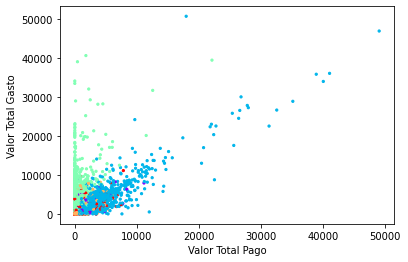

In [20]:
import matplotlib.pyplot as plt
plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor Total Pago")
plt.ylabel("Valor Total Gasto")
plt.show()

**Descrição dos Atributos**

In [22]:
dados["cluster"] = labels
dados.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0         411.0  1987.501586  1854.459156  70.794108  1018.958891   
1        1537.0  1142.320861  1664.363459   0.000000   212.282538   
2        1073.0  1795.328292  1982.485775   0.000000   507.076999   
3        3280.0   443.746756   846.398201   0.000000    23.365333   
4        2649.0  3037.962543  2478.838161   6.824905  1256.612223   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1337.287314  2138.678431  11670.179850             411.0  0.989486   
1         555.131027  1370.317105  19043.138560            1537.0  0.928267   
2        1088.056301  2315.003636  14581.459140            1073.0  0.862260   
3          82.941478   410.126095   9630.367575            3280.0  0.774389   
4        2174.018945  4223.867789  18495.558550            2649.0  0.963740   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...      7112.618584  76406.207520            411.0  0.019318   
1        ...       523.893953  18621.013310           1537.0  0.278150   
2        ...       884.183626  21235.065300           1073.0  0.117430   
3        ...       248.733727   4483.503862           3280.0  0.246806   
4        ...      1330.593643   8345.641905           2649.0  0.001799   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.090901  0.0  0.0  0.000000  0.000000  1.0  
1        0.367086  0.0  0.0  0.083333  0.545455  1.0  
2        0.186772  0.0  0.0  0.083333  0.142857  1.0  
3        0.346748  0.0  0.0  0.000000  0.444444  1.0  
4        0.023260  0.0  0.0  0.000000  0.000000  0.6  

[5 rows x 128 columns]

In [23]:
centroides = kmeans.cluster_centers_
centroides

array([[3.32918803e-01, 2.68423552e-04, 1.58240376e-01, 3.63059801e-02,
        1.22319068e-01, 5.83557153e-02, 1.66754597e-04, 2.64938445e-05,
        1.47063187e-04, 1.93217566e-05, 4.27934836e-04, 3.86197017e-03,
        3.76718873e-01, 2.51861450e-01, 6.80311114e-01, 4.23993819e-06],
       [1.59999628e-01, 2.45301618e-04, 4.38629300e-01, 2.57109259e-01,
        1.81691775e-01, 2.58728121e-02, 2.04397971e-04, 8.90423829e-05,
        1.50590954e-04, 9.39341912e-06, 1.69901859e-04, 6.17457556e-03,
        6.03719056e-01, 4.02576568e-01, 8.54459126e-02, 7.19457109e-05],
       [2.35130689e-01, 2.16418717e-04, 6.04525670e-02, 3.44569238e-02,
        2.60008529e-02, 3.99755165e-01, 5.26563547e-05, 2.05235176e-05,
        3.52245850e-05, 6.54254245e-05, 1.57052528e-03, 1.12425758e-03,
        5.35275552e-01, 5.98057989e-01, 1.04294158e-01, 2.77348362e-05],
       [6.90890221e-02, 2.30787435e-04, 1.21507361e-01, 4.79670320e-02,
        7.36405575e-02, 2.43310654e-02, 1.72863102e-04, 3.366

In [28]:
max = len(centroides[0])
for i in range(max):
  print(dados.columns.values[i], centroides[:, i].var())

BALANCE 0.022409423461416705
BALANCE_FREQUENCY 4.587928758315326e-10
PURCHASES 0.019669183816627245
ONEOFF_PURCHASES 0.007652821155903197
INSTALLMENTS_PURCHASES 0.003575925273792474
CASH_ADVANCE 0.022508084080863626
PURCHASES_FREQUENCY 3.719051217661298e-09
ONEOFF_PURCHASES_FREQUENCY 6.414734370844868e-10
PURCHASES_INSTALLMENTS_FREQUENCY 2.709535400008917e-09
CASH_ADVANCE_FREQUENCY 6.031642741893597e-10
CASH_ADVANCE_TRX 3.3057484758869873e-07
PURCHASES_TRX 3.4229746341498526e-06
CREDIT_LIMIT 0.03598548120806572
PAYMENTS 0.027980416164051412
MINIMUM_PAYMENTS 0.054329853404071225
PRC_FULL_PAYMENT 1.0475079193635398e-09


Parâmetros elegiveis

BALANCE = limite disponível

PURCHASES = valor de compras

CASH_ADVANCE = valor de saques

CREDIT_LIMIT = limite de crédito total

PAYMENTS = valor total pago

MINIMUM_PAYMENTS = mínimo pago

Com base na intepretação dos atributos podemos retirar o MINIMUM_PAYMENTS

In [40]:
description = dados.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1987.501586   854.865815    421.129352   2227.737226  1336.238911   
1        1142.320861  3273.425517    183.376625   4097.306540  3036.763695   
2        1795.328292   476.810531   3267.199032   3982.452201  4713.384730   
3         443.746756   629.249107    141.482978   5130.547795   814.294226   
4        3037.962543   385.248630   1636.917210   4495.771989   968.890376   

         n_clients  
cluster             
0              411  
1             1537  
2             1073  
3             3280  
4             2649  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [41]:
dados.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,411.0,0.019318,0.090901,0.0,0.0,0.000000,0.000000,1.0
1,1537.0,0.278150,0.367086,0.0,0.0,0.083333,0.545455,1.0
2,1073.0,0.117430,0.186772,0.0,0.0,0.083333,0.142857,1.0
3,3280.0,0.246806,0.346748,0.0,0.0,0.000000,0.444444,1.0
4,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6


CLUSTER 0: menor limite de crédito; pagamento menor que o gasto; menos clientes

CLUSTER 1: gastam muito com compras no cartão; pagamento maior que o gasto; melhores pagadores

CLUSTER 2: gastam muito com saques; pagamentos bem maior do que o gasto

CLUSTER 3: menores gastos; maior limite de crédito; mais clientes

CLUSTER 4: maiores gastos; menor valor em compras; valor considerável de saques; pagamento bem abaixo do valor gasto; piores pagadores

**Estratégias Possíveis de Negócio**

-Estimular os clientes do cluster 3 a gastarem mais

-Outros clusters bons para estimular o consumo são o cluster 1 e o cluster 2

-Clusters 0 e 4 estão entre os piores pagadores (o que os diferencia é que o cluster 0 tem pouco limite e o cluster 4 tem bastante limite)